In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

#Load the dataset
df = pd.read_csv('flights.csv')




In [53]:
#Set the data frame to just data from flight 1 to reduce computing time
df = df.loc[(df['flight'] == 1)]
df

,flight,time,wind_speed,wind_angle,battery_voltage,battery_current,position_x,position_y,position_z,orientation_x,...,angular_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z,speed,payload,altitude,date,time_day,route
0,1,0.00,0.1,12.0,24.222174,0.087470,-79.782396,40.458047,269.332402,0.001772,...,0.006815,0.004258,-0.120405,-9.811137,4.0,0.0,25,2019-04-07,10:13,R5
1,1,0.20,0.1,3.0,24.227180,0.095421,-79.782396,40.458047,269.332056,0.001768,...,0.002034,0.006175,-0.116397,-9.810392,4.0,0.0,25,2019-04-07,10:13,R5
2,1,0.30,0.1,352.0,24.225929,0.095421,-79.782396,40.458047,269.333081,0.001768,...,-0.000874,0.002696,-0.128592,-9.809440,4.0,0.0,25,2019-04-07,10:13,R5
3,1,0.50,0.1,354.0,24.224678,0.095421,-79.782396,40.458047,269.334648,0.001775,...,0.002443,0.002024,-0.128271,-9.810159,4.0,0.0,25,2019-04-07,10:13,R5
4,1,0.60,0.1,359.0,24.210905,0.079518,-79.782396,40.458047,269.336178,0.001775,...,-0.006425,0.008271,-0.119890,-9.812125,4.0,0.0,25,2019-04-07,10:13,R5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1,200.12,0.5,106.0,23.061522,0.135180,-79.782348,40.458035,268.296291,-0.000503,...,-0.001796,0.232549,0.733589,-9.772775,4.0,0.0,25,2019-04-07,10:13,R5
1335,1,200.30,0.5,104.0,23.070286,0.135180,-79.782348,40.458034,268.307138,-0.000486,...,-0.004984,0.230562,0.743619,-9.772132,4.0,0.0,25,2019-04-07,10:13,R5
1336,1,200.40,0.5,99.0,23.067781,0.143132,-79.782348,40.458034,268.310919,-0.000496,...,-0.005924,0.234810,0.736684,-9.774733,4.0,0.0,25,2019-04-07,10:13,R5
1337,1,200.60,0.5,103.0,23.059017,0.119277,-79.782348,40.458034,268.324848,-0.000478,...,0.000394,0.232103,0.732756,-9.772891,4.0,0.0,25,2019-04-07,10:13,R5


## Support Vector Machine

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import classification_report

df.columns

Index(['flight', 'time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z', 'speed', 'payload', 'altitude', 'date',
       'time_day', 'route'],
      dtype='object')

In [55]:

svr_x = df.drop(['velocity_y', 'date', 'altitude', 'time_day', 'route', 'flight', 'time', 'altitude'], axis=1)
svr_y = df['velocity_y']
svr_x_train, svr_x_test, svr_y_train, svr_y_test = train_test_split(svr_x, svr_y, test_size=0.33)



In [56]:
svr_model = SVR(kernel='linear')
svr_model.fit(svr_x_train, svr_y_train.astype('int'))

SVR(kernel='linear')

In [57]:
svr_predictions = svr_model.predict(svr_x_test)

In [58]:
print("R-squared:", clf.score(velocity_y_test, Y_test))
print("MSE:", mean_squared_error(Y_test, Y_pred)**0.05)

R-squared: 0.8186981313916011
MSE: 0.9780324976872139


## Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
x = df[['velocity_y', 'linear_acceleration_y']]
ws = df['wind_speed']

In [59]:
lr_model = LinearRegression()
x_train, x_test, ws_train, ws_test = train_test_split(x, ws, test_size =0.33)

lr_model.fit(x_train, ws_train)

LinearRegression()

In [60]:
lr_predictions = lr_model.predict(x_test)
lr_residuals = lr_predictions - ws_test

residuals

806     0.763561
1145   -0.403734
981    -1.135830
205    -2.492244
398     1.689025
          ...   
691    -0.694690
208    -1.557607
214    -0.383551
345     2.052256
252    -1.274043
Name: wind_speed, Length: 442, dtype: float64

(array([ 9., 12., 53., 52., 99., 61., 30., 53., 52., 21.]),
 array([-2.65407703, -2.16497448, -1.67587192, -1.18676937, -0.69766682,
        -0.20856427,  0.28053829,  0.76964084,  1.25874339,  1.74784594,
         2.2369485 ]),
 <BarContainer object of 10 artists>)

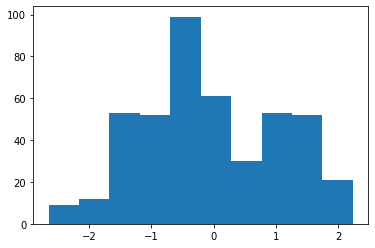

In [61]:
plt.hist(lr_residuals)

In [62]:
print("R-squared:", lr_model.score(x_test, ws_test))
print("MSE:", mean_squared_error(ws_test, predictions)**0.05)


R-squared: 0.7017299922410485
MSE: 1.0961266661800826


## Random Forest Regressor

In [63]:
rfr_model=RandomForestRegressor(random_state=42)
rfr_model.fit(x_train, ws_train)

RandomForestRegressor(random_state=42)

In [64]:
rfr_predictions = rfr_model.predict(x_test)
rfr_residuals = rfr_predictions - ws_test

(array([  4.,   7.,  17.,  65., 185., 112.,  38.,   5.,   5.,   4.]),
 array([-2.11700011, -1.6706001 , -1.22420009, -0.77780008, -0.33140006,
         0.11499995,  0.56139996,  1.00779997,  1.45419999,  1.9006    ,
         2.34700001]),
 <BarContainer object of 10 artists>)

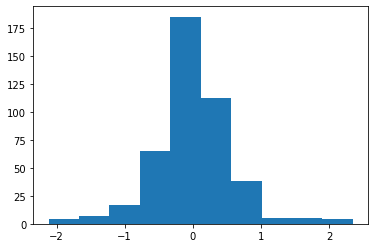

In [65]:
plt.hist(rfr_residuals)

In [66]:
print("R-squared:", rfr.score(x_test, ws_test))
print("MSE:", mean_squared_error(ws_test, rfr_predictions)**0.05)

R-squared: 0.9685480034484268
MSE: 0.9441962195825586
